In [1]:
from scipy import io
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from SparseCoefRecovery import *
import time
from sklearn.manifold.spectral_embedding_ import spectral_embedding
from sklearn.cluster.k_means_ import k_means

In [2]:
#load data first
#data = io.loadmat('DBA_segmented_data_subset.mat')
data = io.loadmat('C57_segmented_data.mat')
X = data ['inlier_newV']
#data = io.loadmat('DBA_all_RUs.mat')
#data = io.loadmat('DBA_clean.mat')
#X = data['V']
X = X/np.linalg.norm(X,ord=2,axis=0)
nb_of_syllables = X.shape[1] 

In [5]:
#begin cosine similarity + spetral clustering

In [3]:
#CKSym = X.T@X

In [4]:
#CKSym = CKSym-np.diag(np.diag(CKSym))

In [18]:
#CKSym[30,30]

In [10]:
#set the number of clusters
#K = 40

In [5]:
#Embed = spectral_embedding(CKSym, n_components=60, eigen_solver=None,
#                       random_state=None, eigen_tol=0.0,
#                       norm_laplacian=True, drop_first=False)

#normalize embedding to unit vector
#Embed = Embed/np.linalg.norm(Embed,ord=2,axis=0)

In [6]:
# do k-means with embedding
#_, labels, _ = k_means(Embed[:,:60], n_clusters=60, n_init=10)

In [2]:
#investigate the number of each cluster
#labelsum = np.zeros(60)
#for i in range(60):
#    labelsum[i] = np.sum(labels==i)
#print(np.sort(labelsum))

In [8]:
#save labels
#file = 'DBA_subset_label_clean_cosine_60.mat'
#label = {}
#label['label'] = labels+1
#label['inliers'] = np.ones(nb_of_syllables)
#io.savemat(file,label)

In [15]:
#visualization
#Y_sne = TSNE(n_components = 2).fit_transform(Embed[:,:40])

In [1]:
#plt.figure(figsize=(10,10))
#plt.scatter(Y_sne[:, 0], Y_sne[:, 1],s = 10, c = labels,cmap=plt.cm.Spectral)
#plt.show()

In [ ]:
#finish cosine similarity + spetral clustering

In [ ]:
#begin sparse subsapce clustering

In [3]:
#check the size of dataset
#each data per column
print(X.shape)

(4096, 8958)


In [4]:
#set hyperparameter
lmbda = 0.3  #1/np.sqrt(100) cst=0

In [5]:
#because of using lasso package
#do not need to run this line if you do not use lasso package in sklearn
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
lmbda = lmbda/(X.shape[0]-1)

In [6]:
#sparse representation 
print('begin representation')
CMat = SparseCoefRecovery(X, Opt='Lasso', lmbda=lmbda)
#CMat = SparseCoefRecovery(X, Opt='omp', lmbda=lmbda)
print('finish representation')

begin representation
cst 0
0 0.00024127960205078125
1 1.0578641891479492
2 1.8536431789398193
3 2.7592692375183105
4 3.9559295177459717
5 5.1236796379089355
6 7.769134759902954
7 8.859390020370483
8 10.94944167137146
9 11.53037405014038
10 12.22475790977478
11 14.304510354995728
12 16.943161487579346
13 17.455753087997437
14 18.44555974006653
15 19.81537365913391
16 20.818249702453613
17 21.33599328994751
18 21.994575262069702
19 22.339925050735474
20 22.930626153945923
21 23.76958441734314
22 24.389770984649658
23 24.89100480079651
24 25.368817567825317
25 26.400310277938843
26 27.085591554641724
27 28.492835521697998
28 29.168957471847534
29 30.142226457595825
30 31.75876259803772
31 32.72644567489624
32 33.27092123031616
33 34.105013847351074
34 35.00890612602234
35 35.666911602020264
36 36.243120431900024
37 36.804473876953125
38 37.401777267456055
39 38.45101547241211
40 39.759567737579346
41 40.43030571937561
42 41.980613470077515
43 43.350013256073
44 44.13766431808472
45 44.772

369 371.24809432029724
370 372.41422939300537
371 373.55465936660767
372 374.46202540397644
373 375.1948149204254
374 376.26921677589417
375 377.03368377685547
376 377.757755279541
377 378.58318042755127
378 380.59316420555115
379 382.66896057128906
380 384.2646253108978
381 385.06901812553406
382 386.0605113506317
383 388.479008436203
384 389.7804958820343
385 390.47544407844543
386 392.31566739082336
387 394.28332352638245
388 395.22932624816895
389 396.4204614162445
390 397.4468643665314
391 398.2122366428375
392 400.1281268596649
393 400.9406478404999
394 403.24929332733154
395 404.1676654815674
396 405.3340091705322
397 406.88867688179016
398 407.6906397342682
399 409.328688621521
400 411.26292848587036
401 413.06021428108215
402 415.8776078224182
403 417.2123472690582
404 418.1190481185913
405 423.84537839889526
406 424.37813210487366
407 425.4532518386841
408 426.9923777580261
409 428.445782661438
410 430.28248834609985
411 430.940336227417
412 431.7068486213684
413 432.20493817

741 860.3647768497467
742 860.9240205287933
743 862.1148777008057
744 862.6511073112488
745 863.7441186904907
746 865.0244734287262
747 865.5662550926208
748 867.1818602085114
749 867.8906743526459
750 868.4441249370575
751 869.2268249988556
752 871.4602146148682
753 872.151216506958
754 873.20769739151
755 873.7325222492218
756 874.2073743343353
757 875.4175086021423
758 876.1195363998413
759 876.7499966621399
760 877.910183429718
761 878.9914190769196
762 880.0088279247284
763 880.527081489563
764 881.1340870857239
765 882.0221536159515
766 882.8980524539948
767 884.0383956432343
768 884.9931063652039
769 885.4895527362823
770 886.7187042236328
771 888.0076348781586
772 889.7006258964539
773 890.0816493034363
774 890.7897717952728
775 891.7026746273041
776 892.8242073059082
777 893.9472806453705
778 894.9953932762146
779 896.1592919826508
780 896.8191854953766
781 897.6873548030853
782 898.2936134338379
783 899.6669058799744
784 900.2759170532227
785 900.734406709671
786 902.67399144

1102 1221.3267767429352
1103 1221.9478342533112
1104 1223.0084586143494
1105 1223.5764558315277
1106 1224.3616988658905
1107 1225.5095036029816
1108 1225.905329465866
1109 1227.9999113082886
1110 1228.807343006134
1111 1229.6204617023468
1112 1230.3379113674164
1113 1232.1582791805267
1114 1233.3401136398315
1115 1234.0248973369598
1116 1234.9480075836182
1117 1235.852322101593
1118 1237.1121401786804
1119 1237.8608288764954
1120 1238.4724946022034
1121 1239.1855013370514
1122 1240.2076568603516
1123 1241.3485939502716
1124 1242.9524457454681
1125 1243.8576629161835
1126 1244.6788382530212
1127 1245.447634935379
1128 1246.686897277832
1129 1248.5600707530975
1130 1249.6336591243744
1131 1250.3105273246765
1132 1250.9700956344604
1133 1251.9990258216858
1134 1252.4924478530884
1135 1253.4411222934723
1136 1254.3714952468872
1137 1254.785091638565
1138 1255.7130496501923
1139 1256.6331644058228
1140 1258.5735507011414
1141 1259.6997601985931
1142 1260.613079071045
1143 1261.5705485343933

1447 1572.28945851326
1448 1572.877324104309
1449 1573.5726227760315
1450 1574.5779106616974
1451 1575.1348350048065
1452 1575.7295694351196
1453 1577.4899983406067
1454 1579.0315146446228
1455 1580.1616249084473
1456 1580.7802963256836
1457 1581.3620545864105
1458 1582.1665389537811
1459 1583.6234061717987
1460 1584.3777315616608
1461 1586.713045835495
1462 1588.5248551368713
1463 1590.6870629787445
1464 1591.500144481659
1465 1592.863056898117
1466 1596.1613562107086
1467 1596.4763643741608
1468 1597.2459981441498
1469 1599.6873235702515
1470 1601.097543001175
1471 1602.7818913459778
1472 1605.3760569095612
1473 1606.4315993785858
1474 1607.0640108585358
1475 1608.002560377121
1476 1610.9937341213226
1477 1612.11962556839
1478 1613.007093667984
1479 1613.4747722148895
1480 1614.0136456489563
1481 1615.5036177635193
1482 1616.2087502479553
1483 1616.651417016983
1484 1618.7129080295563
1485 1619.534803390503
1486 1620.4524412155151
1487 1621.7907190322876
1488 1622.2114641666412
1489 

1792 2041.799512386322
1793 2043.1155207157135
1794 2044.6752727031708
1795 2045.585149526596
1796 2047.4921596050262
1797 2048.042249917984
1798 2049.399970769882
1799 2050.3686842918396
1800 2051.230780363083
1801 2052.139173269272
1802 2054.1816277503967
1803 2054.8496680259705
1804 2055.67644572258
1805 2059.422746658325
1806 2060.3908553123474
1807 2061.223024368286
1808 2061.7646086215973
1809 2063.2090775966644
1810 2064.176248550415
1811 2065.533560037613
1812 2065.957696199417
1813 2067.8269894123077
1814 2070.5257802009583
1815 2072.7327840328217
1816 2073.773155927658
1817 2075.2795009613037
1818 2077.344261407852
1819 2079.7343850135803
1820 2083.4407210350037
1821 2084.496681213379
1822 2086.554408311844
1823 2088.672706604004
1824 2089.403836965561
1825 2090.1250681877136
1826 2091.1572346687317
1827 2092.013571739197
1828 2093.2731103897095
1829 2094.4707641601562
1830 2095.159380197525
1831 2096.2741405963898
1832 2096.817240715027
1833 2097.5731766223907
1834 2099.3182

2141 2481.7684712409973
2142 2482.128312110901
2143 2483.9774889945984
2144 2484.742418527603
2145 2486.4312422275543
2146 2487.4021956920624
2147 2489.466346502304
2148 2490.3234906196594
2149 2491.374607563019
2150 2492.9150111675262
2151 2494.6005120277405
2152 2495.8320009708405
2153 2496.6261444091797
2154 2497.229194879532
2155 2497.9161643981934
2156 2498.530466556549
2157 2499.0341691970825
2158 2499.9151163101196
2159 2500.8786425590515
2160 2501.339963197708
2161 2501.946401834488
2162 2504.3392481803894
2163 2507.652268409729
2164 2508.8118002414703
2165 2510.05108833313
2166 2510.439037322998
2167 2512.1095671653748
2168 2513.320339202881
2169 2514.2768268585205
2170 2515.1063656806946
2171 2516.556298017502
2172 2517.149718761444
2173 2518.634646177292
2174 2519.351453781128
2175 2519.9451479911804
2176 2520.662173509598
2177 2521.6288294792175
2178 2522.03675198555
2179 2523.5439031124115
2180 2524.592597961426
2181 2525.5656032562256
2182 2526.896139860153
2183 2527.6842

2490 2952.1331787109375
2491 2953.26641702652
2492 2954.4007766246796
2493 2955.8714537620544
2494 2956.8543322086334
2495 2957.918372631073
2496 2958.45503950119
2497 2961.0961513519287
2498 2964.6561896800995
2499 2966.3559086322784
2500 2967.3067574501038
2501 2968.9229691028595
2502 2969.901720046997
2503 2971.1006095409393
2504 2971.4682726860046
2505 2972.1524696350098
2506 2972.9235587120056
2507 2974.10493350029
2508 2975.302716255188
2509 2976.2750239372253
2510 2980.019310951233
2511 2981.263974428177
2512 2983.269855260849
2513 2988.0662372112274
2514 2990.0079448223114
2515 2990.563253879547
2516 2991.250374317169
2517 2992.7185995578766
2518 2994.999814271927
2519 2996.058733224869
2520 2999.0730018615723
2521 3000.476886034012
2522 3002.5838038921356
2523 3005.2816755771637
2524 3005.969179391861
2525 3006.4006247520447
2526 3008.080777168274
2527 3009.93062376976
2528 3011.0694160461426
2529 3011.6386189460754
2530 3012.077332496643
2531 3013.2463829517365
2532 3014.3373

2840 3292.7441849708557
2841 3293.3774588108063
2842 3294.955087184906
2843 3296.1367061138153
2844 3296.7626502513885
2845 3297.525438308716
2846 3297.980073451996
2847 3298.5320081710815
2848 3299.958072900772
2849 3301.066668987274
2850 3302.2511134147644
2851 3302.8184728622437
2852 3303.2147302627563
2853 3303.706526517868
2854 3304.120822429657
2855 3304.403689622879
2856 3305.4142351150513
2857 3305.919959306717
2858 3306.337944984436
2859 3307.90122795105
2860 3308.5473532676697
2861 3309.1397404670715
2862 3312.044248342514
2863 3314.392322063446
2864 3315.586777448654
2865 3316.168475627899
2866 3316.916626214981
2867 3317.6073246002197
2868 3319.3955121040344
2869 3319.9460322856903
2870 3320.6298172473907
2871 3321.4161443710327
2872 3323.8280272483826
2873 3324.457622051239
2874 3324.9886791706085
2875 3325.5244505405426
2876 3326.7004323005676
2877 3327.454777240753
2878 3328.0440888404846
2879 3329.108330011368
2880 3329.622005224228
2881 3330.963071346283
2882 3332.0859

3189 3598.6294424533844
3190 3601.477375984192
3191 3602.2452652454376
3192 3603.6902520656586
3193 3604.277606487274
3194 3606.3611056804657
3195 3606.910096168518
3196 3607.9119348526
3197 3609.419605255127
3198 3610.1937515735626
3199 3610.6860365867615
3200 3611.3316032886505
3201 3612.1480042934418
3202 3612.8305995464325
3203 3613.5401837825775
3204 3614.108069419861
3205 3615.6261954307556
3206 3616.4260234832764
3207 3619.0480058193207
3208 3620.322295665741
3209 3621.1610543727875
3210 3621.707820892334
3211 3622.32559132576
3212 3622.6486718654633
3213 3623.12472820282
3214 3623.7918469905853
3215 3624.54035449028
3216 3625.3765852451324
3217 3627.5781061649323
3218 3628.512239933014
3219 3629.2029099464417
3220 3629.677825450897
3221 3630.576588153839
3222 3630.9476170539856
3223 3631.8137085437775
3224 3633.092479944229
3225 3633.9006536006927
3226 3634.9244980812073
3227 3635.9544191360474
3228 3637.3631584644318
3229 3638.9661655426025
3230 3640.1490383148193
3231 3640.41

3538 3990.094283103943
3539 3990.9171533584595
3540 3991.6281802654266
3541 3992.8228125572205
3542 3993.616701364517
3543 3996.444116592407
3544 3996.8475375175476
3545 3998.2416212558746
3546 3999.446280479431
3547 4000.1815905570984
3548 4000.8025567531586
3549 4001.6214957237244
3550 4002.339395046234
3551 4003.0685012340546
3552 4003.64949965477
3553 4004.368031024933
3554 4005.125255584717
3555 4005.63182926178
3556 4006.4087359905243
3557 4007.380624294281
3558 4007.865097284317
3559 4008.831892490387
3560 4009.4039738178253
3561 4010.114933490753
3562 4010.7321677207947
3563 4011.282563686371
3564 4012.3857131004333
3565 4013.118677377701
3566 4013.733938932419
3567 4015.6127095222473
3568 4016.945945262909
3569 4017.5217995643616
3570 4017.9884996414185
3571 4018.4766640663147
3572 4019.328110933304
3573 4019.897253036499
3574 4021.3322808742523
3575 4022.0019059181213
3576 4022.6500267982483
3577 4024.0499761104584
3578 4025.1651298999786
3579 4025.6887385845184
3580 4027.277

3892 4347.731919288635
3893 4348.317847967148
3894 4348.7594957351685
3895 4349.445295095444
3896 4350.004822731018
3897 4350.57350730896
3898 4351.132223367691
3899 4351.595693588257
3900 4352.497378110886
3901 4354.0070559978485
3902 4354.630109071732
3903 4355.012263536453
3904 4356.128160715103
3905 4357.0833377838135
3906 4358.704611301422
3907 4359.253004789352
3908 4360.4020438194275
3909 4361.21658039093
3910 4361.734708070755
3911 4365.148016452789
3912 4366.364411830902
3913 4367.168567895889
3914 4368.1330308914185
3915 4368.83474779129
3916 4369.616365432739
3917 4370.145554065704
3918 4370.921478509903
3919 4371.576143741608
3920 4372.109534502029
3921 4372.691386461258
3922 4373.452297210693
3923 4374.7308621406555
3924 4375.919103384018
3925 4376.53023648262
3926 4377.428009271622
3927 4378.157374620438
3928 4380.884613275528
3929 4382.049027681351
3930 4383.031271696091
3931 4385.894545555115
3932 4386.339713811874
3933 4386.963782787323
3934 4388.1505081653595
3935 438

4249 4724.2757976055145
4250 4725.122682094574
4251 4726.8243498802185
4252 4727.872811794281
4253 4728.574134588242
4254 4729.3553013801575
4255 4731.203040122986
4256 4731.979315519333
4257 4733.054216623306
4258 4734.759182214737
4259 4737.628579378128
4260 4738.85197520256
4261 4740.5920259952545
4262 4741.458156108856
4263 4742.404440879822
4264 4743.03928232193
4265 4745.02846288681
4266 4745.565385818481
4267 4747.1664955616
4268 4748.127786397934
4269 4749.760591268539
4270 4750.933359861374
4271 4752.297297954559
4272 4754.160620927811
4273 4755.229718446732
4274 4755.804293870926
4275 4756.305976867676
4276 4757.791254043579
4277 4758.312700271606
4278 4760.758319377899
4279 4762.25062584877
4280 4762.791560649872
4281 4764.093589067459
4282 4766.127408504486
4283 4767.136777639389
4284 4768.350650548935
4285 4770.593062639236
4286 4771.521536827087
4287 4772.700232744217
4288 4773.406286478043
4289 4774.424023389816
4290 4775.125728845596
4291 4776.314402580261
4292 4777.405

4606 5131.814472198486
4607 5132.329858541489
4608 5132.894956827164
4609 5133.486916542053
4610 5134.035777568817
4611 5134.891787290573
4612 5135.861090660095
4613 5136.78425526619
4614 5137.238950967789
4615 5138.2797956466675
4616 5142.117734670639
4617 5143.130908727646
4618 5144.004861116409
4619 5144.784878253937
4620 5145.413798093796
4621 5146.223331212997
4622 5146.949734926224
4623 5147.783425569534
4624 5148.174014806747
4625 5149.076495170593
4626 5149.627291202545
4627 5150.234764099121
4628 5150.925584316254
4629 5151.655504703522
4630 5152.316571712494
4631 5152.871798992157
4632 5153.422472476959
4633 5154.175046682358
4634 5154.825328826904
4635 5155.792181968689
4636 5157.459666967392
4637 5158.211935520172
4638 5159.010268688202
4639 5159.6507205963135
4640 5160.380096673965
4641 5160.984377384186
4642 5161.435110807419
4643 5161.8619594573975
4644 5162.665992498398
4645 5163.158789157867
4646 5164.0690796375275
4647 5166.312539815903
4648 5167.98625087738
4649 5168

4963 5491.070877313614
4964 5492.3204135894775
4965 5493.1763615608215
4966 5493.637248039246
4967 5494.30860042572
4968 5495.393746376038
4969 5495.914472579956
4970 5496.391664505005
4971 5497.327912807465
4972 5498.047837018967
4973 5499.481336355209
4974 5502.4888281822205
4975 5504.478921890259
4976 5505.1776831150055
4977 5506.545875310898
4978 5507.13800740242
4979 5507.863895177841
4980 5508.693163633347
4981 5509.118573188782
4982 5509.965054273605
4983 5510.949528694153
4984 5511.5010306835175
4985 5512.899765014648
4986 5513.784377336502
4987 5514.28591966629
4988 5514.836873531342
4989 5516.960159778595
4990 5520.570333003998
4991 5521.5542051792145
4992 5522.126794099808
4993 5523.00078868866
4994 5524.804292201996
4995 5527.378892421722
4996 5528.079461812973
4997 5528.969719409943
4998 5529.8308210372925
4999 5530.462246656418
5000 5531.331392526627
5001 5531.794203281403
5002 5532.1968059539795
5003 5532.732393741608
5004 5533.508177280426
5005 5534.2137541770935
5006 5

5320 5888.13241815567
5321 5888.8755469322205
5322 5889.970459699631
5323 5890.5826807022095
5324 5891.742608547211
5325 5892.891567707062
5326 5894.319082736969
5327 5894.985644340515
5328 5895.482174158096
5329 5896.701861619949
5330 5897.5764989852905
5331 5898.432528734207
5332 5900.340327978134
5333 5900.818940877914
5334 5902.134119749069
5335 5903.123883724213
5336 5905.090291500092
5337 5905.853960752487
5338 5907.038910627365
5339 5908.382635831833
5340 5908.875330924988
5341 5909.366562128067
5342 5910.259782075882
5343 5911.065314769745
5344 5911.578583240509
5345 5912.001828193665
5346 5913.200810670853
5347 5914.2212064266205
5348 5915.288901567459
5349 5915.817498207092
5350 5916.384509801865
5351 5917.376860141754
5352 5918.768739461899
5353 5919.952849149704
5354 5921.31902885437
5355 5923.023419141769
5356 5923.8202040195465
5357 5924.599364995956
5358 5925.127621412277
5359 5925.618537664413
5360 5926.9881155490875
5361 5928.6322503089905
5362 5932.659460544586
5363 5

5677 6331.400905132294
5678 6332.30105471611
5679 6333.156181335449
5680 6335.834836483002
5681 6338.963814973831
5682 6340.413343906403
5683 6341.5222244262695
5684 6343.363958120346
5685 6343.920953273773
5686 6344.342075824738
5687 6347.251554727554
5688 6348.629619598389
5689 6349.585014820099
5690 6350.170799255371
5691 6350.704248428345
5692 6351.196261405945
5693 6351.810585021973
5694 6352.439838886261
5695 6352.836275100708
5696 6353.405699253082
5697 6354.439265966415
5698 6355.101067304611
5699 6357.187463521957
5700 6360.406606674194
5701 6361.43443441391
5702 6361.96963596344
5703 6362.732338666916
5704 6364.3858852386475
5705 6365.305632829666
5706 6366.198429107666
5707 6366.9640254974365
5708 6367.601188898087
5709 6368.598582267761
5710 6369.697587013245
5711 6370.754621505737
5712 6371.475120306015
5713 6372.552822351456
5714 6374.377060413361
5715 6375.293037652969
5716 6377.258474111557
5717 6378.104580163956
5718 6379.892770290375
5719 6380.850484609604
5720 6381.4

6035 6776.289459228516
6036 6777.093109846115
6037 6778.172326803207
6038 6778.817939758301
6039 6779.240105867386
6040 6779.891602277756
6041 6780.291688203812
6042 6780.805258512497
6043 6782.2130398750305
6044 6784.169648885727
6045 6785.788900613785
6046 6786.911654472351
6047 6789.423224925995
6048 6790.958720445633
6049 6791.963250637054
6050 6792.591748952866
6051 6794.76673746109
6052 6795.876416444778
6053 6796.953136444092
6054 6799.825940132141
6055 6802.142135381699
6056 6803.551500558853
6057 6804.938449382782
6058 6805.567984580994
6059 6806.605835914612
6060 6807.679168462753
6061 6808.180693626404
6062 6809.678607225418
6063 6810.580272912979
6064 6811.16806101799
6065 6812.287734270096
6066 6813.737347841263
6067 6815.190003871918
6068 6815.915812730789
6069 6816.665036439896
6070 6817.374429941177
6071 6818.49830532074
6072 6819.700574636459
6073 6820.893128633499
6074 6821.665216207504
6075 6822.496762037277
6076 6823.714758634567
6077 6825.223734140396
6078 6827.947

6392 7157.193452119827
6393 7158.152606010437
6394 7159.179932594299
6395 7160.649837255478
6396 7162.076285123825
6397 7163.098135232925
6398 7163.8024797439575
6399 7164.358915567398
6400 7165.268607139587
6401 7165.859885931015
6402 7166.406055450439
6403 7167.111924171448
6404 7167.749489307404
6405 7168.5882833004
6406 7169.554869651794
6407 7170.336002588272
6408 7172.0930387973785
6409 7172.563907384872
6410 7174.451632738113
6411 7176.091714859009
6412 7176.638404369354
6413 7177.745226860046
6414 7178.371642827988
6415 7179.07995891571
6416 7179.610013008118
6417 7180.874515295029
6418 7181.751544713974
6419 7182.800731897354
6420 7183.25367975235
6421 7183.920572280884
6422 7184.735843658447
6423 7185.494714021683
6424 7186.0079736709595
6425 7186.464895486832
6426 7187.092072725296
6427 7187.624979734421
6428 7188.178139448166
6429 7188.735145807266
6430 7189.171702384949
6431 7191.003186941147
6432 7192.165347099304
6433 7192.656809091568
6434 7193.320927143097
6435 7193.90

6749 7515.220135211945
6750 7516.162805557251
6751 7516.8891360759735
6752 7517.4350781440735
6753 7518.073291301727
6754 7519.1681480407715
6755 7520.123871088028
6756 7520.836430072784
6757 7521.307994604111
6758 7522.046195983887
6759 7522.800240039825
6760 7523.534593582153
6761 7524.019014120102
6762 7525.201579093933
6763 7525.917685747147
6764 7526.9336948394775
6765 7527.855283737183
6766 7528.530665636063
6767 7528.992858409882
6768 7529.647969722748
6769 7532.90265750885
6770 7533.904385328293
6771 7534.739382982254
6772 7535.46598815918
6773 7536.931261777878
6774 7538.077634572983
6775 7539.028638601303
6776 7539.63914847374
6777 7541.177303791046
6778 7541.763115167618
6779 7542.204750537872
6780 7544.131607294083
6781 7544.90097784996
6782 7545.853110790253
6783 7546.517265796661
6784 7549.062642812729
6785 7549.700314283371
6786 7550.117476224899
6787 7551.036333084106
6788 7551.8824903965
6789 7552.403965473175
6790 7553.290493965149
6791 7553.69007730484
6792 7554.6866

7106 7864.179556846619
7107 7864.986892938614
7108 7866.0992341041565
7109 7867.308646678925
7110 7868.199197769165
7111 7869.041289806366
7112 7869.930489063263
7113 7870.89439201355
7114 7871.547511577606
7115 7872.499652147293
7116 7873.214100122452
7117 7873.920045852661
7118 7874.946154594421
7119 7876.861170291901
7120 7878.544682502747
7121 7879.453528404236
7122 7880.288606882095
7123 7880.701408863068
7124 7881.472126960754
7125 7882.246973276138
7126 7882.618675708771
7127 7883.358355522156
7128 7883.808012485504
7129 7884.905482530594
7130 7886.176495313644
7131 7887.148755073547
7132 7888.600798606873
7133 7889.590218544006
7134 7890.492225885391
7135 7891.102126598358
7136 7893.831484556198
7137 7894.954205274582
7138 7895.356664180756
7139 7896.046176433563
7140 7896.564532756805
7141 7897.600142717361
7142 7898.3470957279205
7143 7899.08087015152
7144 7899.604886054993
7145 7901.48970746994
7146 7902.7064418792725
7147 7904.218182086945
7148 7905.044279575348
7149 7905.6

7464 8268.198374509811
7465 8269.131072044373
7466 8269.981118917465
7467 8270.749480962753
7468 8272.001194477081
7469 8272.644947767258
7470 8273.183428525925
7471 8274.255234241486
7472 8275.057358026505
7473 8275.790483951569
7474 8276.448698043823
7475 8277.061974048615
7476 8277.932444095612
7477 8279.58777832985
7478 8280.248788833618
7479 8281.208698272705
7480 8281.986307144165
7481 8283.787257432938
7482 8285.758409261703
7483 8286.943519830704
7484 8288.161592960358
7485 8289.063671588898
7486 8291.26772236824
7487 8292.540225744247
7488 8294.8759932518
7489 8296.9032933712
7490 8298.829951524734
7491 8300.319084405899
7492 8301.094018697739
7493 8301.53280711174
7494 8303.503185272217
7495 8305.54632115364
7496 8306.683930158615
7497 8308.219529867172
7498 8309.856252908707
7499 8310.448436498642
7500 8310.827270507812
7501 8311.573481321335
7502 8312.913254499435
7503 8313.663276672363
7504 8315.791942119598
7505 8316.317407131195
7506 8317.419073104858
7507 8317.861806392

7825 8605.191373348236
7826 8605.799686431885
7827 8606.21988749504
7828 8606.457078456879
7829 8607.018528699875
7830 8607.419600963593
7831 8607.821944713593
7832 8608.077935934067
7833 8608.354076862335
7834 8608.937803268433
7835 8609.27579164505
7836 8609.69898891449
7837 8610.122851848602
7838 8610.359284639359
7839 8610.736362218857
7840 8611.173145771027
7841 8611.552238225937
7842 8612.06834077835
7843 8612.63560795784
7844 8612.91224694252
7845 8613.371629238129
7846 8613.989024877548
7847 8614.490655899048
7848 8614.91634464264
7849 8615.394397974014
7850 8615.81900024414
7851 8616.135655403137
7852 8616.570012807846
7853 8616.887910842896
7854 8617.303549289703
7855 8617.66061091423
7856 8617.898165941238
7857 8618.375026464462
7858 8619.166811943054
7859 8619.504649400711
7860 8619.878722667694
7861 8620.294097661972
7862 8620.908020734787
7863 8621.221745967865
7864 8621.616855859756
7865 8621.852633237839
7866 8622.226858854294
7867 8622.46030330658
7868 8622.85775208473

8185 8766.81694817543
8186 8767.277702093124
8187 8767.905321598053
8188 8768.177965641022
8189 8768.8195977211
8190 8769.33782529831
8191 8770.014320611954
8192 8770.249993801117
8193 8770.74722790718
8194 8771.10254740715
8195 8771.638658285141
8196 8772.077346801758
8197 8772.676669120789
8198 8772.984210252762
8199 8773.333456993103
8200 8773.72341632843
8201 8774.306419849396
8202 8774.54376411438
8203 8774.861697673798
8204 8775.237617015839
8205 8775.49453663826
8206 8775.756187677383
8207 8776.0306494236
8208 8776.524732589722
8209 8776.902740478516
8210 8777.332350730896
8211 8777.959243774414
8212 8778.478573083878
8213 8778.980798244476
8214 8779.634323835373
8215 8780.446763515472
8216 8780.9705555439
8217 8781.393280744553
8218 8781.821634054184
8219 8782.223089456558
8220 8782.704699754715
8221 8783.085685253143
8222 8783.640811443329
8223 8783.892332792282
8224 8784.309340715408
8225 8784.768032073975
8226 8785.231570243835
8227 8785.814282655716
8228 8786.373754739761
8

8545 8931.678807497025
8546 8932.198522090912
8547 8932.604329586029
8548 8933.0070707798
8549 8933.463621616364
8550 8933.999596834183
8551 8934.238147258759
8552 8934.633923053741
8553 8934.910649776459
8554 8935.36704325676
8555 8935.604748487473
8556 8935.861092090607
8557 8936.23844075203
8558 8936.519299507141
8559 8936.995908737183
8560 8937.494945764542
8561 8937.934396505356
8562 8938.373182296753
8563 8938.612355232239
8564 8939.007212162018
8565 8939.386818170547
8566 8939.845974445343
8567 8940.416860580444
8568 8940.915500879288
8569 8941.151754617691
8570 8941.75117635727
8571 8942.18278002739
8572 8942.480625152588
8573 8942.983602285385
8574 8943.519626379013
8575 8944.002794504166
8576 8944.361347198486
8577 8944.800017595291
8578 8945.532790184021
8579 8945.956749677658
8580 8946.442686319351
8581 8946.821645975113
8582 8947.59727358818
8583 8948.159323692322
8584 8948.553875207901
8585 8949.135152816772
8586 8949.959035634995
8587 8950.375680446625
8588 8951.23660349

8905 9093.420659542084
8906 9093.7772295475
8907 9094.077951669693
8908 9094.960877418518
8909 9095.208219051361
8910 9095.826010465622
8911 9096.734865427017
8912 9097.248359203339
8913 9097.819842338562
8914 9098.061753034592
8915 9098.30646944046
8916 9098.799492359161
8917 9099.04157090187
8918 9099.400708913803
8919 9099.892543792725
8920 9100.463847875595
8921 9101.01462340355
8922 9101.319140195847
8923 9101.892147064209
8924 9102.134599208832
8925 9102.592426776886
8926 9102.949848651886
8927 9103.330765724182
8928 9103.825066804886
8929 9104.1852414608
8930 9104.656630277634
8931 9105.150311231613
8932 9105.649332046509
8933 9106.105433702469
8934 9106.331296682358
8935 9106.651270389557
8936 9106.91275382042
8937 9107.309299707413
8938 9107.897510290146
8939 9108.336103200912
8940 9108.772757291794
8941 9109.034539699554
8942 9109.258808374405
8943 9109.560717582703
8944 9110.169306516647
8945 9110.512145996094
8946 9110.889638900757
8947 9111.190016269684
8948 9111.510212421

In [7]:
#you can save the coefficients here
file = 'C57_Coefficient_clean_SSC_40.mat'
data = {}
data['CMat'] = CMat
io.savemat(file,data)

#you can load the coefficients here
#file = 'C57_Coefficient_clean_oldV.mat'
#data = io.loadmat(file)
#CMat = data['CMat']

In [8]:
#check the result of sparse representation
thres = 0.001
count = np.zeros(CMat.shape[0])
count_zero = 0
CMat[CMat<0] = 0
temC = CMat+CMat.T
for i in range(CMat.shape[0]):
    count[i] = np.sum(temC[:,i]>thres)
    count_zero += count[i]<=0
print('the average #(nonzero coefficient)' , np.mean(count))
#the min and max
print(np.min(count),np.max(count))
#the number of data which can't be represented by other data points are also outliers
print(count_zero)

the average #(nonzero coefficient) 9.08015181960259
0.0 35.0
78


In [9]:
inliers = count>0.5
outliers = count<0.5

In [10]:
#extract the data which can be represented by other data points
CMat = CMat[inliers,:]
CMat = CMat[:,inliers]

In [11]:
#build adjacent matrix
CMat[CMat<0] = 0;
CKSym = np.abs(CMat)
CKSym = CKSym+CKSym.T
CKSym[CKSym<thres] = 0

In [12]:
#set the number of clusters
K = 40

In [13]:
# get embedding
Embed = spectral_embedding(CKSym, n_components=K, eigen_solver=None,
                       random_state=None, eigen_tol=0.0,
                       norm_laplacian=True, drop_first=False)

#normalize embedding to unit vector
Embed = Embed/np.linalg.norm(Embed,ord=2,axis=0)

In [14]:
# do k-means with embedding
_, labels, _ = k_means(Embed[:,:40], n_clusters=40, n_init=10)

In [15]:
#investigate the number of each cluster
labelsum = np.zeros(40)
for i in range(40):
    labelsum[i] = np.sum(labels==i)
print(np.sort(labelsum))

[   2.    2.    2.    2.    2.    3.    3.    3.    4.    4.    5.    6.
    6.    6.    7.   13.   24.   35.   54.   62.  128.  198.  280.  312.
  313.  327.  335.  336.  337.  368.  377.  384.  407.  409.  517.  526.
  534.  609.  893. 1045.]


In [16]:
#save labels
file = 'C57_label_clean_SSC_40.mat'
label = {}
label['label'] = labels+1
label['inliers'] = inliers
io.savemat(file,label)

In [17]:
#visualization
Y_sne = TSNE(n_components = 2).fit_transform(Embed[:,:40])

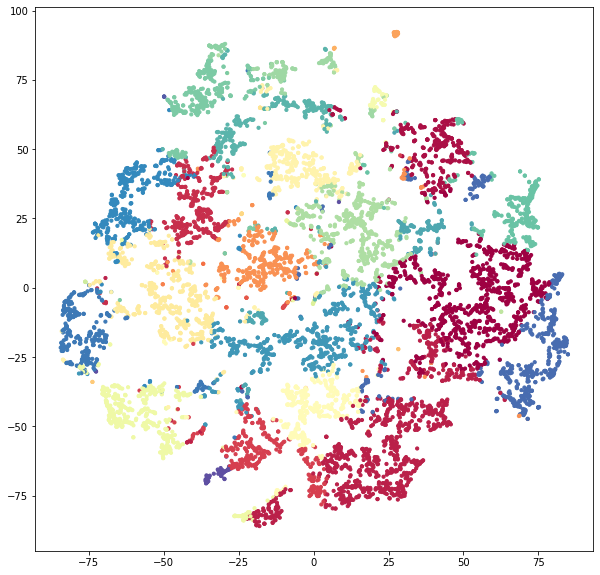

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(Y_sne[:, 0], Y_sne[:, 1],s = 10, c = labels,cmap=plt.cm.Spectral)
plt.show()

In [ ]:
#finish sparse subsapce clustering

In [ ]:
#begin kmeans

In [20]:
#_, labels_k, _ = k_means(X.T, n_clusters=60, n_init=10)

In [3]:
#labelsum = np.zeros(60)
#for i in range(60):
#    labelsum[i] = np.sum(labels_k==i)
#print(np.sort(labelsum))

In [22]:
#file = 'C57_label_clean_kmeans_40.mat'
#label = {}
#label['label'] = labels_k+1
#label['inliers'] = np.ones(nb_of_syllables)
#io.savemat(file,label)

In [ ]:
#dimension reduction(for visualizing the k-means result)
#a = PCA(n_components = 100)
#Y = a.fit_transform(X.T)
#Y = Y.T

In [15]:
#visualization
#Y_sne_k = TSNE(n_components = 2).fit_transform(Y.T)

In [4]:
#plt.figure(figsize=(10,10))
#plt.scatter(Y_sne_k[:, 0], Y_sne_k[:, 1],s = 10, c = labels_k,cmap=plt.cm.Spectral)
#plt.show()